# Vasicek Model

The Vasicek model is a short rate model for interest rates. It describes the evolution of the instantaneous spot rate by a mean-reverting Ornstein-Uhlenbeck process with the following stochastic differential equation (SDE):

$$dr_t = \kappa (\theta - r_t)dt + \sigma dW_t$$
with initial condition $r_0$

where:
- $r_t$ is the instantaneous spot rate;
- $\kappa$ is the speed of mean reversion
- $\theta$ is the long term mean level of the instantaneous spot rate;
- $\sigma$ is the volatility of the instantaneous spot rate; and 
- $W_t$ is a Weiner process (Brownian motion). 

Solving the SDE for the vasicek model, we get the following solution:

$$r_t = r_s \exp^{-\kappa(t - s)} + \theta \big( 1 - \exp^{-\kappa(t - s)} \big) + \sigma \int_s^t \exp^{-\kappa(t - u)} dW_u$$

for each $s < t$.

$r_t$ conditional on $F_s$ is normally distributed with mean and variance given by:

$$\mathbf{E} [r_t|F_s] = r_s \exp^{-\kappa(t - s)} + \theta \big( 1 - \exp^{-\kappa(t - s)} \big)$$

$$\mathbf{Var}[r_t|F_s] = \frac{\sigma^2}{2\kappa}\big[1 - \exp^{-2\kappa(t - s)} \big]$$

as $t \rightarrow \infty$, the limit of expected rate and variance, will converge to $\theta$ and $\frac{\sigma^2}{2\kappa}$ respectively.

Since $r_t$ conditional on $F_s$ is normally distributed, the rate $r_t$ can take on negative values with positive probability. In the past, negative interest rates were seen to be impossible and this was considered to be a major drawback of the vasicek model for interest rates. 

One advantage of the vasicek model is the analytical tractability implied by the normal distribution, which is not easily achieved when other distributions are assumed.

# Simulation

In [1]:
from vasicek import *
import matplotlib.pyplot as plt

In [2]:
vasicek_model = Vasicek(kappa = 0.03, theta = 0.05, sigma = 0.05)

In [4]:
vasicek_paths = vasicek_model.simulate(rt = 0.05, n_years = 2, n_timesteps = 12, n_scenarios = 250)
vasicek_paths

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
1,0.066159,0.057316,0.058726,0.028861,0.052282,0.029380,0.047121,0.022302,0.025711,0.056074,...,0.043717,0.047751,0.052289,0.043665,0.051060,0.033107,0.035296,0.017728,0.056245,0.042313
2,0.056481,0.052282,0.085215,0.047700,0.059318,0.060045,0.037735,-0.003601,0.005379,0.102618,...,0.053318,0.043790,0.094259,0.012573,0.062652,0.051260,0.089148,0.018142,0.090581,0.028206
3,0.023533,0.019491,0.049867,0.045725,0.070825,0.071706,0.039426,0.002312,0.014138,0.098645,...,0.075486,0.035102,0.098305,0.010932,0.077090,0.051666,0.054672,0.033631,0.082470,0.024397
4,0.033659,0.043901,0.061778,0.036506,0.115898,0.085111,0.001068,0.020143,0.036147,0.117165,...,0.045221,0.037475,0.125512,0.027662,0.072685,0.047972,0.038745,0.036447,0.052767,0.042427
5,0.037165,0.038797,0.070023,0.015330,0.105352,0.072020,-0.002592,0.032494,0.053278,0.126196,...,0.062550,0.025013,0.095372,0.025091,0.066704,0.070035,0.021791,0.024794,0.051041,0.050990
6,0.078426,0.044584,0.079613,0.050064,0.119945,0.048647,0.003452,-0.004570,0.110793,0.133959,...,0.059898,0.003496,0.116990,0.016890,0.126738,0.088203,0.008360,0.077183,0.027082,0.023236
7,0.070965,0.046975,0.074440,0.078404,0.139604,0.037078,0.050986,-0.006945,0.104641,0.141252,...,0.026293,0.022560,0.131006,0.013904,0.146915,0.095233,-0.009899,0.065165,0.026430,0.010288
8,0.061923,0.063183,0.056293,0.070507,0.181851,0.032982,0.022107,-0.007506,0.126989,0.142524,...,0.009167,-0.000184,0.127992,-0.003391,0.151089,0.058651,0.014060,0.078855,0.011098,0.045063
9,0.041980,0.081028,0.063924,0.072059,0.168008,0.045084,0.033864,0.004788,0.126057,0.146161,...,0.027457,-0.017831,0.161069,-0.032848,0.151975,0.081869,-0.039664,0.079153,-0.025270,0.034296


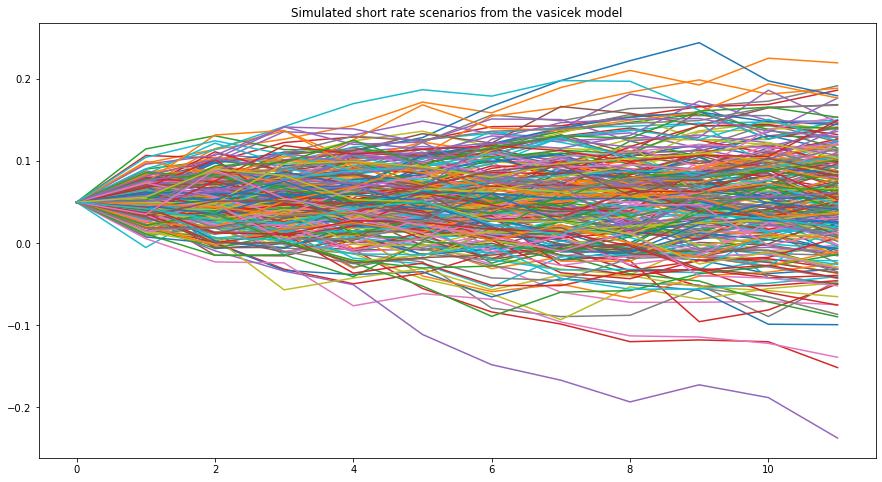

In [5]:
vasicek_paths.plot(figsize = (15, 8), legend = False)
plt.title('Simulated short rate scenarios from the vasicek model')
plt.show()